<a href="https://colab.research.google.com/github/cicaco07/PCVK-2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama : Aryo Deva Saputra
##Kelas / No : 3D / 08
##NIM : 2141720176

####1. Buat Gamma Correction sesuai dengan petunjuk berikut


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


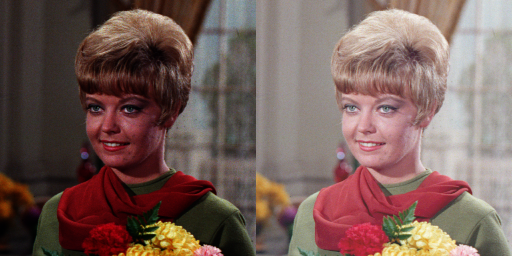

In [32]:
import cv2 as cv
import numpy as np
from skimage import io
from google.colab.patches import cv_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

if original is None:
    print("Gambar tidak ditemukan.")
else:
    gamma_corrected = np.power(original / 255.0, 1/gamma) * 255.0
    gamma_corrected = np.uint8(gamma_corrected)

    final_frame = cv.hconcat((original, gamma_corrected))
    cv_imshow(final_frame)

- Menggunakan
    ***gamma_corrected = np.power(original / 255.0, 1/gamma) * 255.0
    gamma_corrected = np.uint8(gamma_corrected)***
  untuk melakukan gamma correction

####2. Buat Simulasi Image Depth

In [33]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        pixel_value = original[i, j]
        depth_value = int(pixel_value / level)
        depth_image[i, j] = depth_value * level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)


*Kesimpulan : Dari percobaan di atas antara gambar asli yang dibuat grayscale dan gambar kedua yang diatur tingkat image depth nya menjadi lebih tidak jelas karena tingkat kedalamannya diatur menjadi 2*

####3. Buat modul Avarage Denoising

In [34]:
import cv2  as cv
from google.colab.patches import cv2_imshow
from skimage import io
import glob

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

- Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut menggunakan cv_img[0], cv_img[1], dst.

- Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan anda:

#### Jumlah citra di Average 5 :

Nilai PSNR adalah 27.53155745404922 (dB)


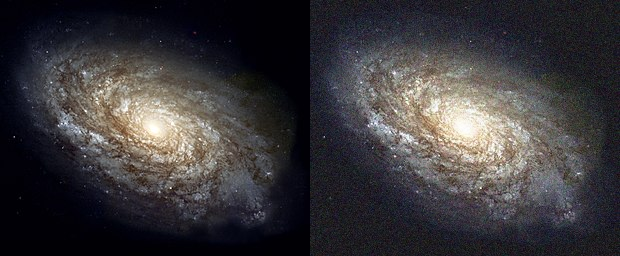

In [35]:
#No 3.1 (citra: 5)

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### Jumlah citra di Average 10 :

In [36]:
#No 3.1 (citra: 10)

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 9 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.54909729207979 (dB)


#### Jumlah citra di Average 20 :

In [37]:
#No 3.1 (citra: 20)

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 19 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.540620022444415 (dB)


#### Jumlah citra di Average 40 :

In [38]:
#No 3.1 (citra: 40)

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 39 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.497637932826983 (dB)


#### Jumlah citra di Average 80 :

In [39]:
#No 3.1 (citra: 80)

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.502888469514048 (dB)


#### Jumlah citra di Average 100 :

Nilai PSNR adalah 27.5125617958574 (dB)


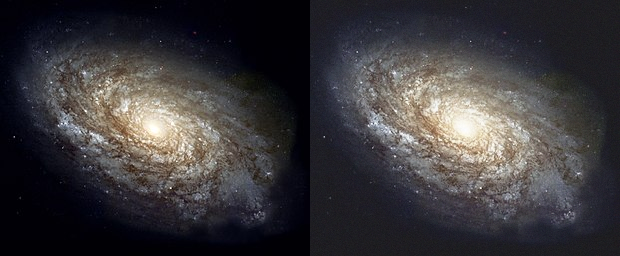

In [40]:
#No 3.1 (citra: 100)

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/noises/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

##### Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah
- Semakin tinggi nilai PSNR nya maka menunjukkan bahwa gambar hasil penggabungan memiliki kualitas yang sangat baik, jauh lebih halus, dan memiliki kemiripan yang tinggi dengan aslinya, begitu juga sebaliknya jika nilai PSNR semakin rendah maka kulitas gambar akan terlihat kasar berbeda dengan gambar aslinya

####4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP), sedangkan image paling kanan adalah hasilnya:


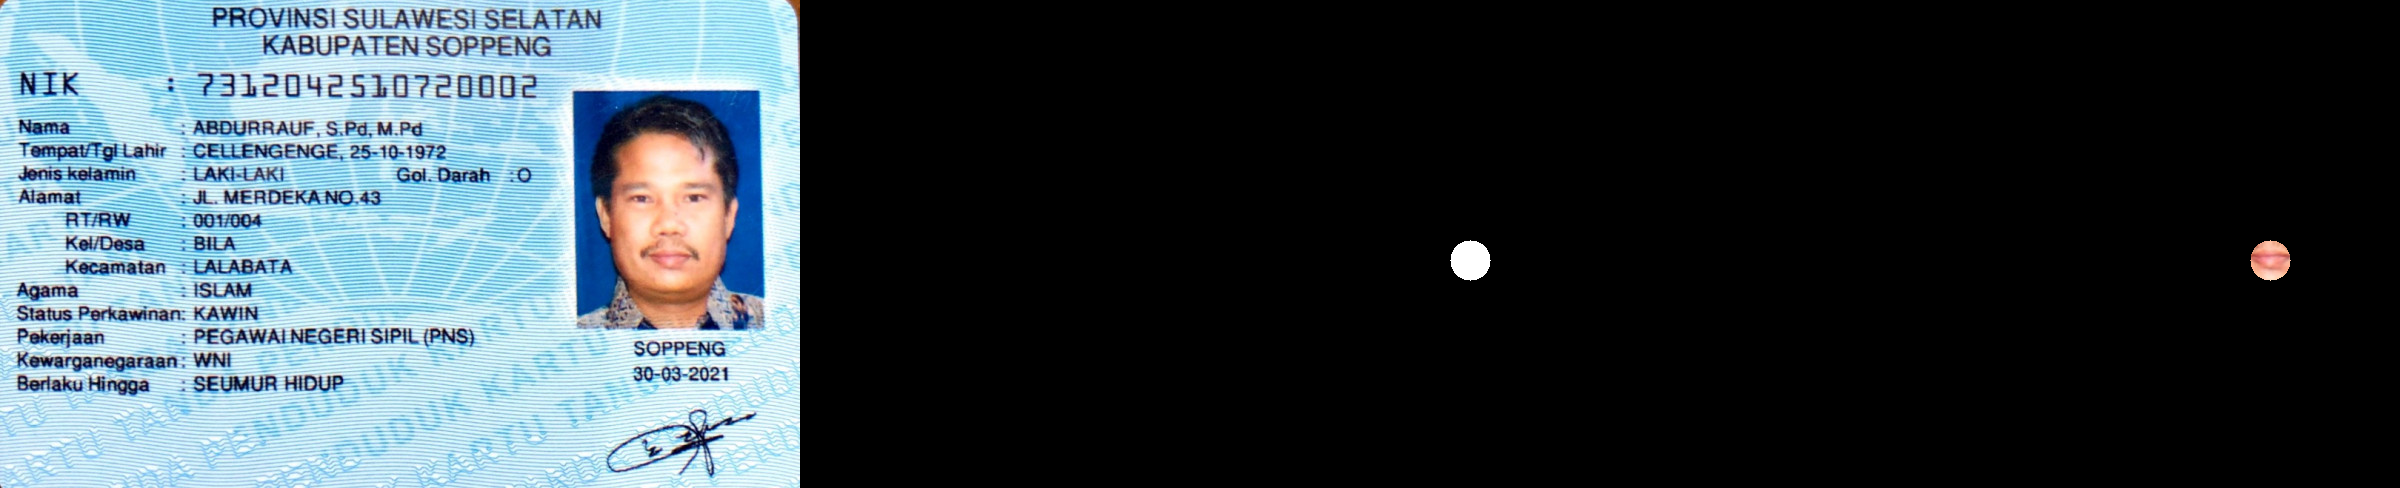

In [41]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (670, 260)  # (x, y) coordinates of the center of the first circle
radius1 = 20

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_and(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)


####5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.
- NOT


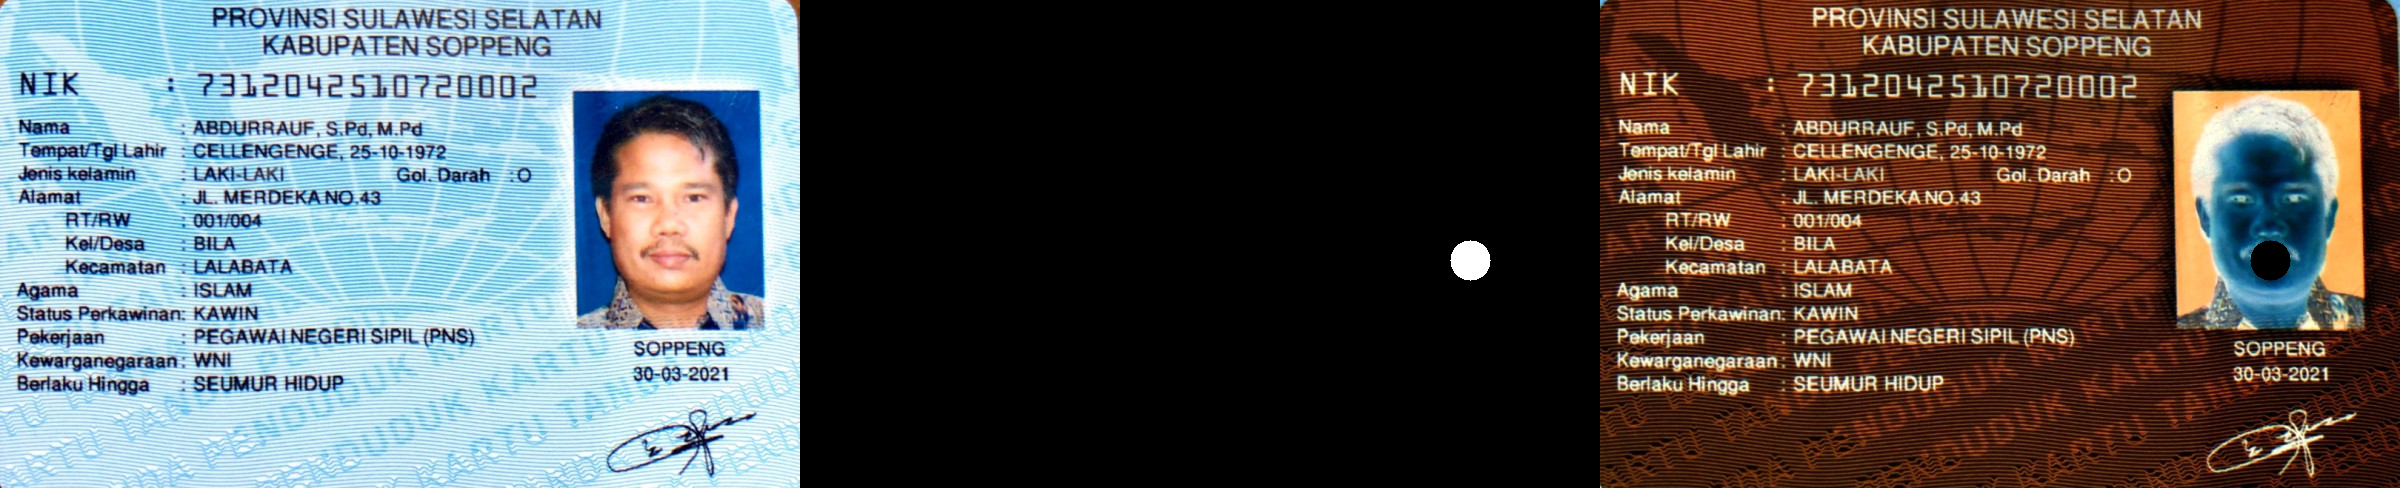

In [42]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (670, 260)  # (x, y) coordinates of the center of the first circle
radius1 = 20

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

masked = ~original_image & ~mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

- OR

In [43]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (670, 260)  # (x, y) coordinates of the center of the first circle
radius1 = 20

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_or(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

- AND (sama seperti no 4)
- NAND

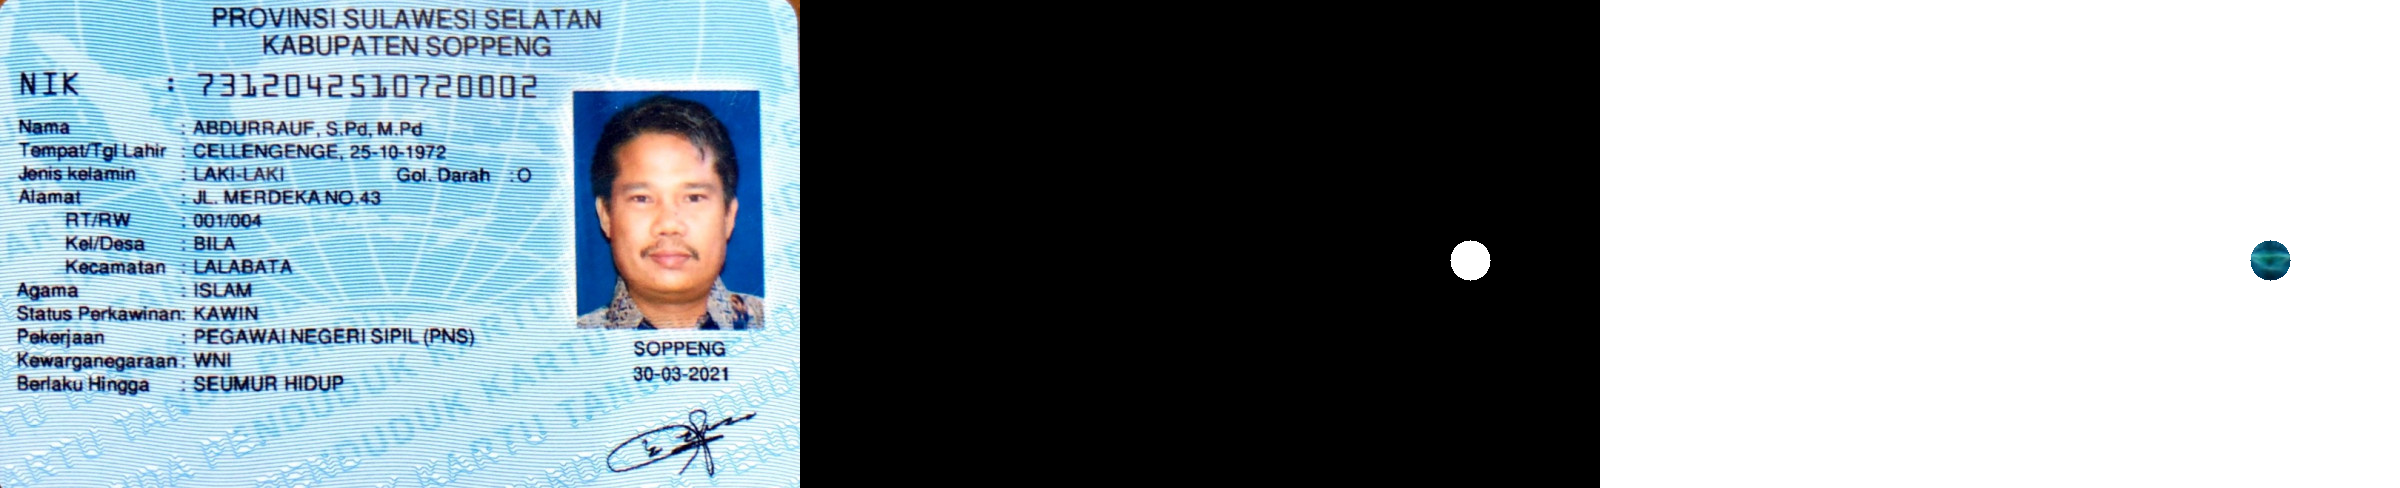

In [44]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (670, 260)  # (x, y) coordinates of the center of the first circle
radius1 = 20

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_not(cv2.bitwise_and(original_image, mask))

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

- XOR

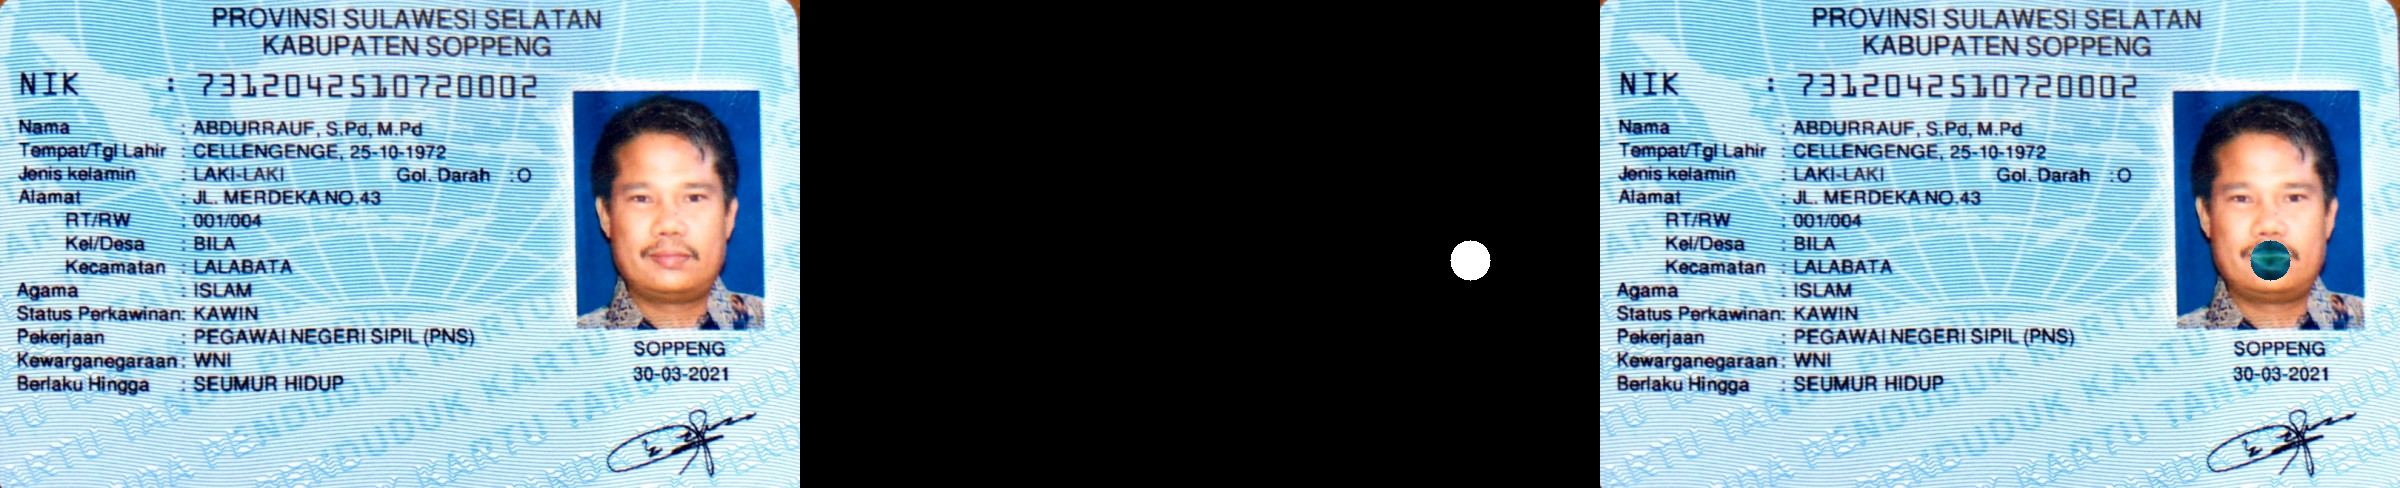

In [45]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (670, 260)  # (x, y) coordinates of the center of the first circle
radius1 = 20

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_xor(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

#### Kesimpulan :
- NOT : Menggabungkan kedua gambar, kemudian membalikkan warna dari penggabunngan sebeumnya
- OR : Menggabungkan kedua gambar, namun masking image tidak ditampilkan
- AND : Menggabungkan kedua gambar, namun outputnya berupa gambar pada lingkaran masking
- NAND : hasil sama seperti AND namun warna dibalikkan (inverse)
- XOR : menggabungkan kedua gambar, namun warna pada masking di balikkan(inverse)